# **P1 Graded Challenge 3** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004


### A. Problem Statement

Create a Classification model using Random Forest and one of the boosting algorithms to predict whether a patient will die or not using the dataset you have obtained.

## 2.QUERY SQL

Before importing the dataset to the notebook we will filter the bigquery dataset using `sql` for the columns needed.

```sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.heart-failure`

```

## 3. IMPORT LIBRARIES 💽

In [10]:
import pandas as pd
import numpy as np

#----------------------------

#Visualization for EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("crest")

#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#----------------------------

# feature-engineering
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#smote
from imblearn.over_sampling import SMOTE

#evaluasi
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import cross_val_score, cross_validate

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

#----------------------------

#save model
import joblib


#Attach images to the google notebook
from IPython.display import Image


pd.set_option('display.max_columns', None)

## 4. DATA LOADING 💽

In [11]:
df = pd.read_csv('/content/h8dsft_P1G3_Karel_Hutajulu.csv')

In [12]:
#Display top 10 rows of dataframe df
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [13]:
#Display top 10 rows of dataframe df
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


### Simple Data Understanding before we explore 🔍

In [14]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Now we verify all the column names

In [15]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


and view how many rows of data do we have to work with.

In [16]:
df.shape

(299, 13)

## 5. EXPLORATORY DATA ANALYSIS (EDA) 🎁

Before we dive into EDA its best for us to read and understand the `definition` of each columns.

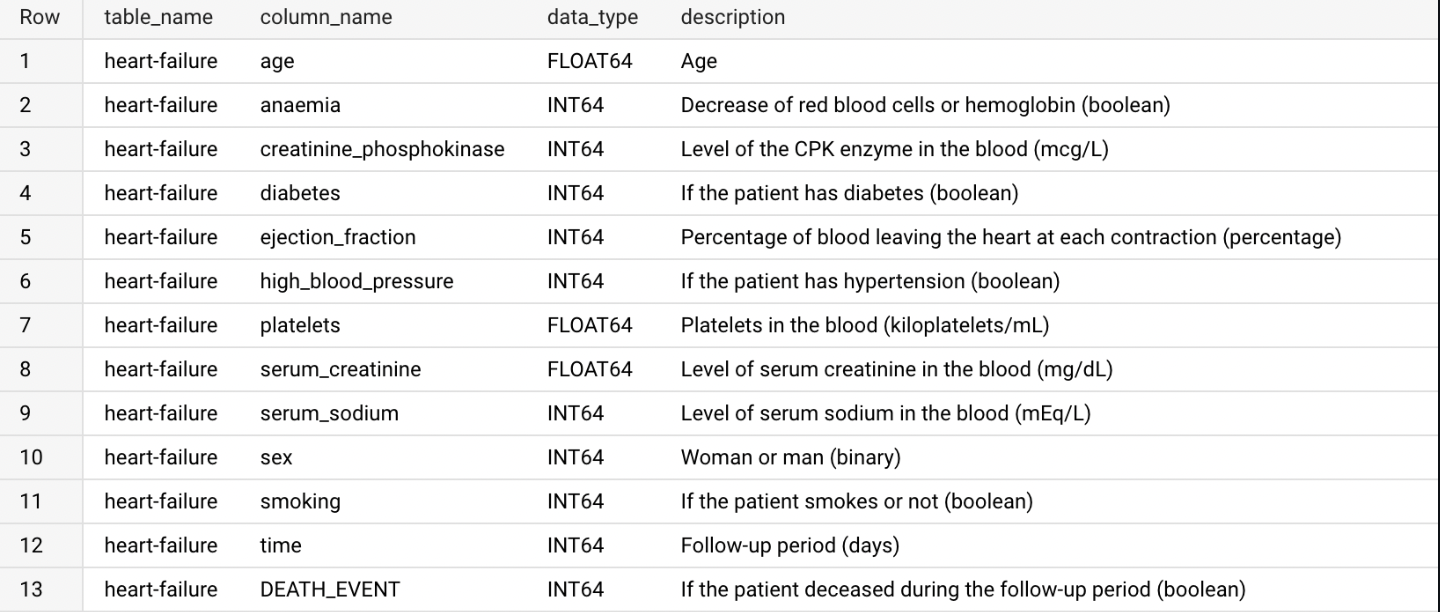

In [80]:
Image('/content/Screenshot 2023-03-17 at 19.31.11.png')

### A. Descriptive Statistic

In [18]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Observation:**

It appears that there may be some outliers or extreme values in the dataset. For example:

1. The maximum value for `creatinine phosphokinase` is `7861`, which is `significantly higher` than the mean value of `581.8` and the standard deviation of 970.3. 

2. Similarly, the maximum value for `serum creatinine` is `9.4,` which is also `significantly higher `than the mean value of `1.39` and the standard deviation of 1.03.

### B. Univariate Analysis

 Continous Numerical Variables Distribution:

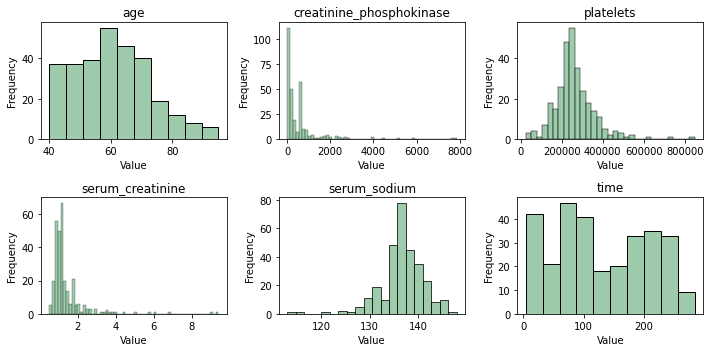

In [19]:
# Define the continous numerical variables
n_val = ['age',  'creatinine_phosphokinase', 'platelets','serum_creatinine', 'serum_sodium','time']

# Plot a histogram for each numerical column
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for i, col in enumerate(n_val):
    sns.histplot(df[col], ax=axs[i//3][i%3])
    axs[i//3][i%3].set_title(col)
    axs[i//3][i%3].set_xlabel('Value')
    axs[i//3][i%3].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


**Observation:** 

Columns age and time are normally distributed. creatinine_phosphokinase, platelets and serum_creatinine is right skewed and is influenced greatly by outliers.

Serum_sodium is left skewed and has outliers.

Categorical Variables Distribution:

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


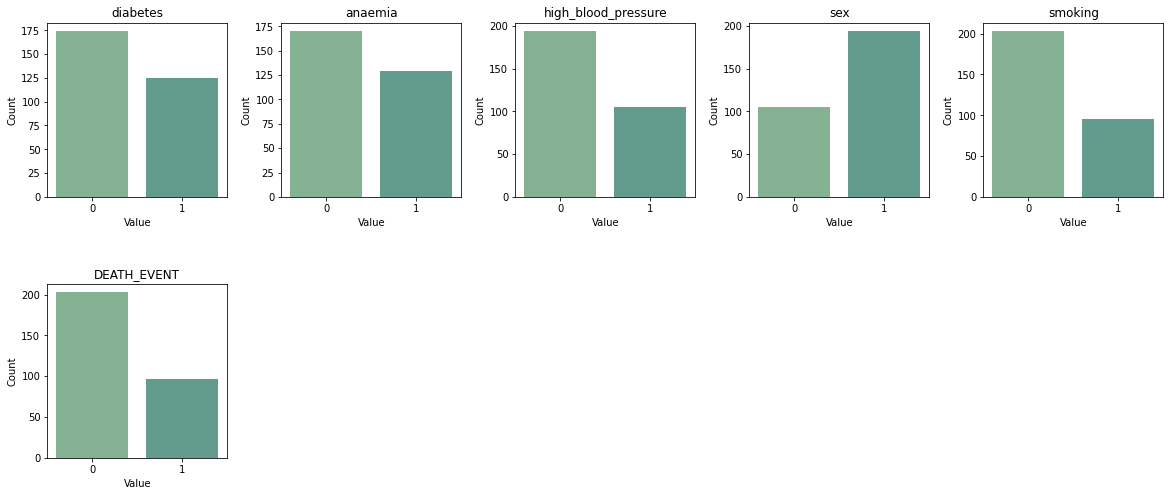

In [20]:
# Define the categorical variables
c_val = ['diabetes','anaemia','high_blood_pressure','sex','smoking','DEATH_EVENT']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), tight_layout=True, 
                         gridspec_kw={"hspace": 0.5, "wspace": 0.3})

# Plot a bar chart for each categorical column
for col, ax in zip(c_val, axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Hide unused subplots
for ax in axes.flatten()[len(c_val):]:
    ax.axis('off')

plt.show()


**Observation:** 

There are more counts of not diabetes,anamia,high_blood_pressure and smoking and this also shows in the target variable `death_event` because there are more people that are still alive compared to dead.

### C. Bivariate Analysis

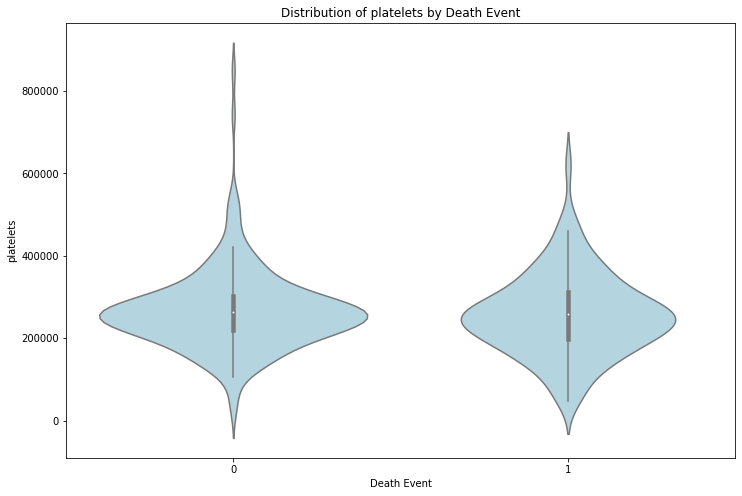

In [21]:
# create boxplot and violin plot for limit_balance by default payment
plt.figure(figsize=(12, 8))
sns.violinplot(x='DEATH_EVENT', y='platelets', data=df, color='lightblue')
plt.title('Distribution of platelets by Death Event')
plt.xlabel('Death Event')
plt.ylabel('platelets')
plt.show()

**Observation:** 

For patients who are still alive the distribution `range` of platelets is wider compared to patients who are dead. This can be caused by outliers or it may just be a natural outlier which can be explained in medical terms.

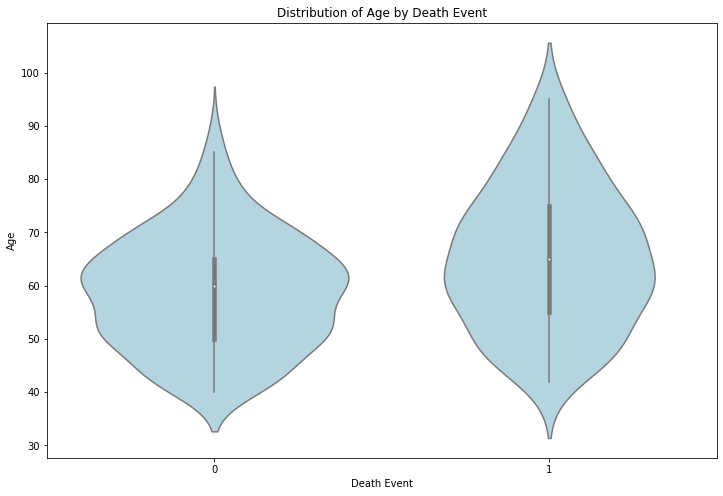

In [22]:
# create boxplot and violin plot for limit_balance by default payment
plt.figure(figsize=(12, 8))
sns.violinplot(x='DEATH_EVENT', y='age', data=df, color='lightblue')
plt.title('Distribution of Age by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()

**Observation:** 

There are more older patients who are dead compared to alive. The middle section in the violin plot is wider in death event 0 meaning there are more middle aged patients compared to in death event = 1.

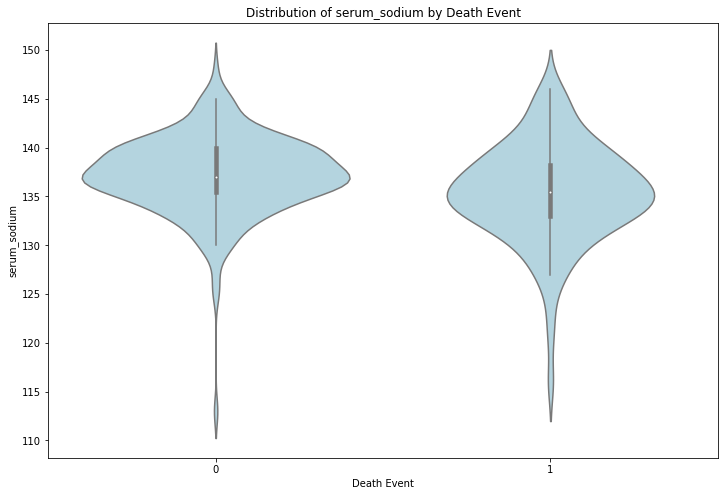

In [23]:
# create boxplot and violin plot for limit_balance by default payment
plt.figure(figsize=(12, 8))
sns.violinplot(x='DEATH_EVENT', y='serum_sodium', data=df, color='lightblue')
plt.title('Distribution of serum_sodium by Death Event')
plt.xlabel('Death Event')
plt.ylabel('serum_sodium')
plt.show()

**Observation:** 

Distribution is more or less the same and could mean that serum_sodium have a low correlation with our target variable which is death_event.

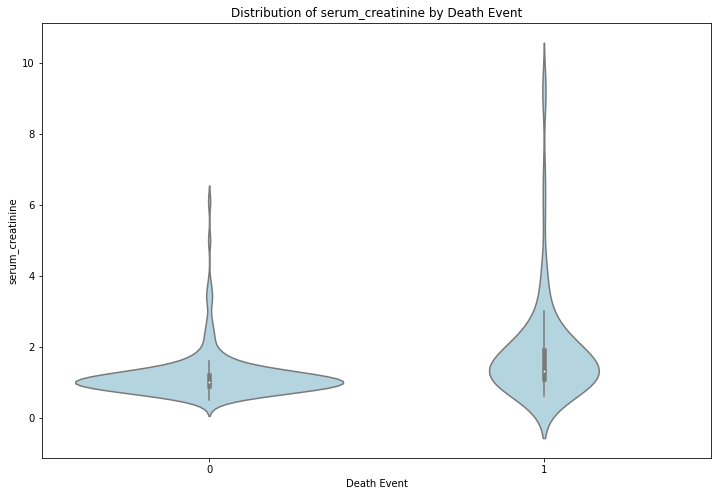

In [24]:
# create boxplot and violin plot for limit_balance by default payment
plt.figure(figsize=(12, 8))
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=df, color='lightblue')
plt.title('Distribution of serum_creatinine by Death Event')
plt.xlabel('Death Event')
plt.ylabel('serum_creatinine')
plt.show()

**Observation:** 

There is a big difference in the distribution of `serum_creatinine` in death event 0 and 1. In death event 1 we can see there are much more patients with extremely high level of creatinine. In death event 0 (still alive) most patients have a creatinine level of between the 0 and 2.

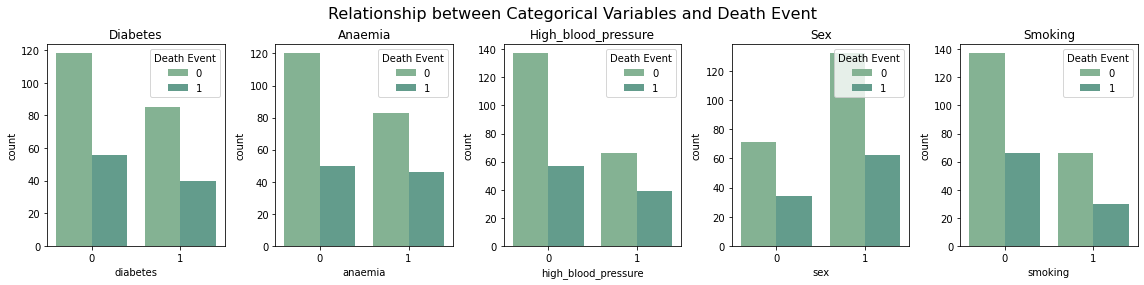

In [25]:
# Set figure size and layout
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

# Create count plot for each categorical variable
for ax, col in zip(axes, ['diabetes', 'anaemia', 'high_blood_pressure', 'sex', 'smoking']):
    sns.countplot(x=col, hue='DEATH_EVENT', data=df, ax=ax)
    ax.set_title(col.capitalize())
    ax.legend(title='Death Event', loc='upper right')

# Set figure title and adjust spacing
fig.suptitle('Relationship between Categorical Variables and Death Event', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.85)


**Observation:** 

Based on our observation, for `diabetes` surprisingly the proportion of dead and alive is around the same. This could indicate that diabetes does not have a significant affect on death of patients.

for `anaemia` and `high_blood_pressure` we could see that there is a significant bigger proportion of patients who died and have anamia. This indicates that anaemia is a factor in identifying death of patients.

for `smoking` we could see that there is a similar proportion of dead/alive between smoker/non-smoker. This indicates that smoking does not have a significant affect on death of patients.


## 5. Data Pre-processing 🐠


### A. Dealing with duplicates

In [26]:
df.duplicated().sum()

0

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**Observation:**

There are no duplicates in this dataset

### B. Dealing with Missing values

In [28]:
df.isna().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [29]:
# calculate the percentage of empty rows in the DataFrame
empty_rows = df.isna().sum().sum()
total_rows = df.shape[0]
percent_empty_rows = (empty_rows / total_rows) * 100

print(f"Percentage of data with empty rows: {percent_empty_rows:.2f}%")

Percentage of data with empty rows: 0.00%


There are no missing values that is why there is no MAR, MCAR,MNAR analysis

### C. Dealing with Outliers

In [30]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
     

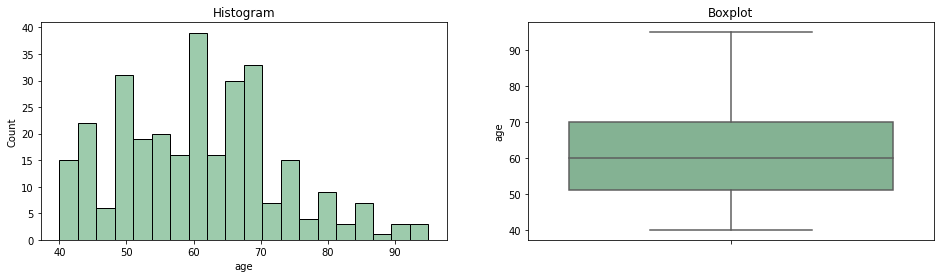


Skewness Value :  0.4230619067286355


In [31]:
diagnostic_plots(df, 'age')
print('\nSkewness Value : ', df['age'].skew())

**Observation:** No outliers for Column Age

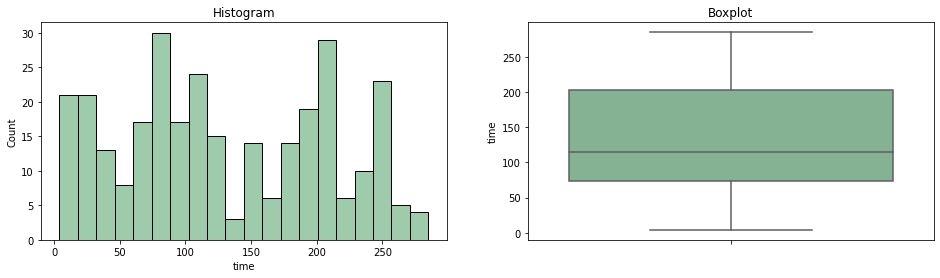


Skewness Value :  0.12780264559841178


In [32]:
diagnostic_plots(df, 'time')
print('\nSkewness Value : ', df['time'].skew())

**Observation:** No outliers for Column Time

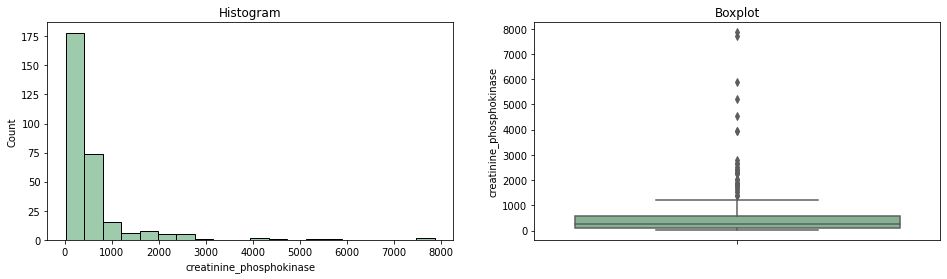


Skewness Value :  4.463110084653752


In [33]:
diagnostic_plots(df, 'creatinine_phosphokinase')
print('\nSkewness Value : ', df['creatinine_phosphokinase'].skew())

**Observation:** creatinine_phosphokinase has a extreme right skewed distribtuion and multiple outliers 

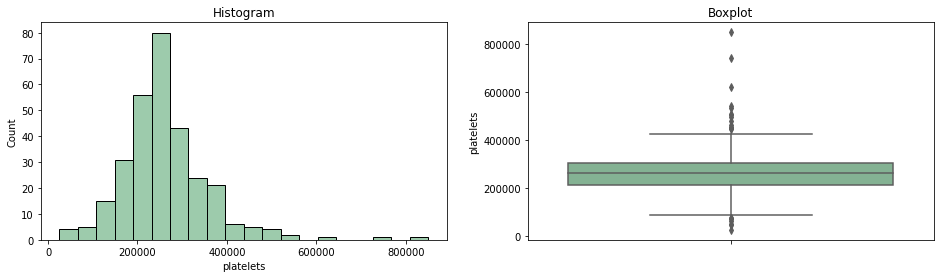


Skewness Value :  1.462320838275779


In [34]:
diagnostic_plots(df, 'platelets')
print('\nSkewness Value : ', df['platelets'].skew())

**Observation:** platelets has a right skewed distribtuion and multiple outliers 

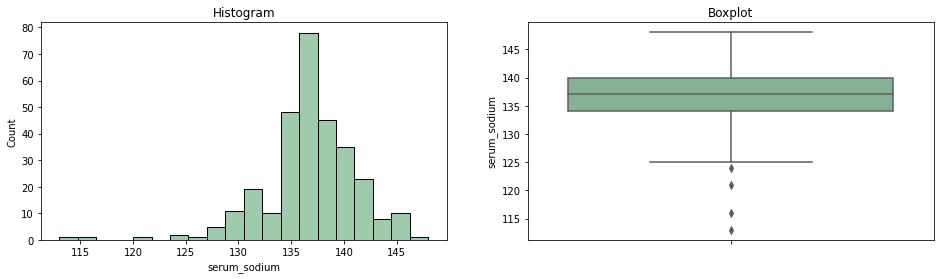


Skewness Value :  -1.0481360160574988


In [35]:
diagnostic_plots(df, 'serum_sodium')
print('\nSkewness Value : ', df['serum_sodium'].skew()) 

**Observation:** serum_sodium has a left skewed distribtuion and multiple outliers 

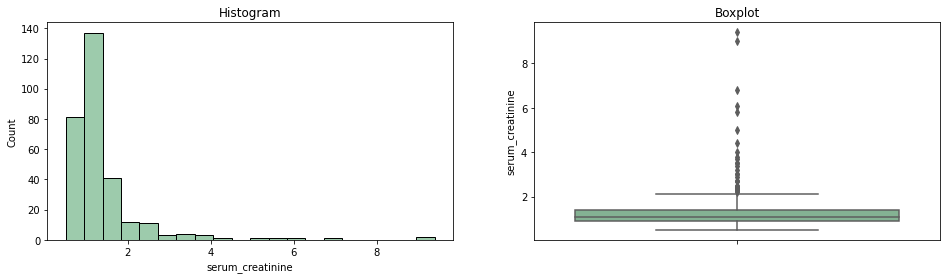


Skewness Value :  4.455995882049029


In [36]:
diagnostic_plots(df, 'serum_creatinine')
print('\nSkewness Value : ', df['serum_creatinine'].skew()) 

**Observation:** serum_creatinine has a right skewed distribtuion and multiple `extreme outliers`

Now we will identify and remove the following columns with outliers: 

- serum_sodium,platelets,creatinine_phosphokinase and serum_creatinine.

Since the distribution is `heavily skewed` I will use `Tukey Method` for outlier removal.

In [37]:
# Calculate the lower and upper quartiles for serum_sodium, platelets, and creatinine_phosphokinase
q1_sodium = df['serum_sodium'].quantile(0.25)
q3_sodium = df['serum_sodium'].quantile(0.75)
iqr_sodium = q3_sodium - q1_sodium

q1_platelets = df['platelets'].quantile(0.25)
q3_platelets = df['platelets'].quantile(0.75)
iqr_platelets = q3_platelets - q1_platelets

q1_creatinine = df['creatinine_phosphokinase'].quantile(0.25)
q3_creatinine = df['creatinine_phosphokinase'].quantile(0.75)
iqr_creatinine = q3_creatinine - q1_creatinine

q1_serum_creatinine = df['serum_creatinine'].quantile(0.25)
q3_serum_creatinine = df['serum_creatinine'].quantile(0.75)
iqr_serum_creatinine = q3_serum_creatinine - q1_serum_creatinine

# Identify the values that fall outside the IQR for serum_sodium, platelets, and creatinine_phosphokinase
outliers = df[(df['serum_sodium'] < q1_sodium - 1.5*iqr_sodium) | (df['serum_sodium'] > q3_sodium + 1.5*iqr_sodium) |
              (df['platelets'] < q1_platelets - 1.5*iqr_platelets) | (df['platelets'] > q3_platelets + 1.5*iqr_platelets) |
              (df['creatinine_phosphokinase'] < q1_creatinine - 1.5*iqr_creatinine) | (df['creatinine_phosphokinase'] > q3_creatinine + 1.5*iqr_creatinine) |
              (df['serum_creatinine'] < q1_serum_creatinine - 1.5*iqr_serum_creatinine) | (df['serum_creatinine'] > q3_serum_creatinine + 1.5*iqr_serum_creatinine)
              ]

In [38]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Lets take a look at an outlier sample, as you can see one has a `really low` creatinie_phosphokinase value of `81` when the mean is `328`. 

In [39]:
outliers.sample(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
184,60.0,0,2261,0,35,1,228000.0,0.9,136,1,0,115,0
79,60.0,0,53,0,50,1,286000.0,2.3,143,0,0,87,0


In [40]:
# Remove the outliers from the dataset
df = df[~df.isin(outliers)].dropna()

Now we check the shape of our dataset after removing the outliers

In [41]:
df.shape

(225, 13)

## 6. Feature Engineering 🔧

### A. Feature Selection using Recurisive Feature Elimination

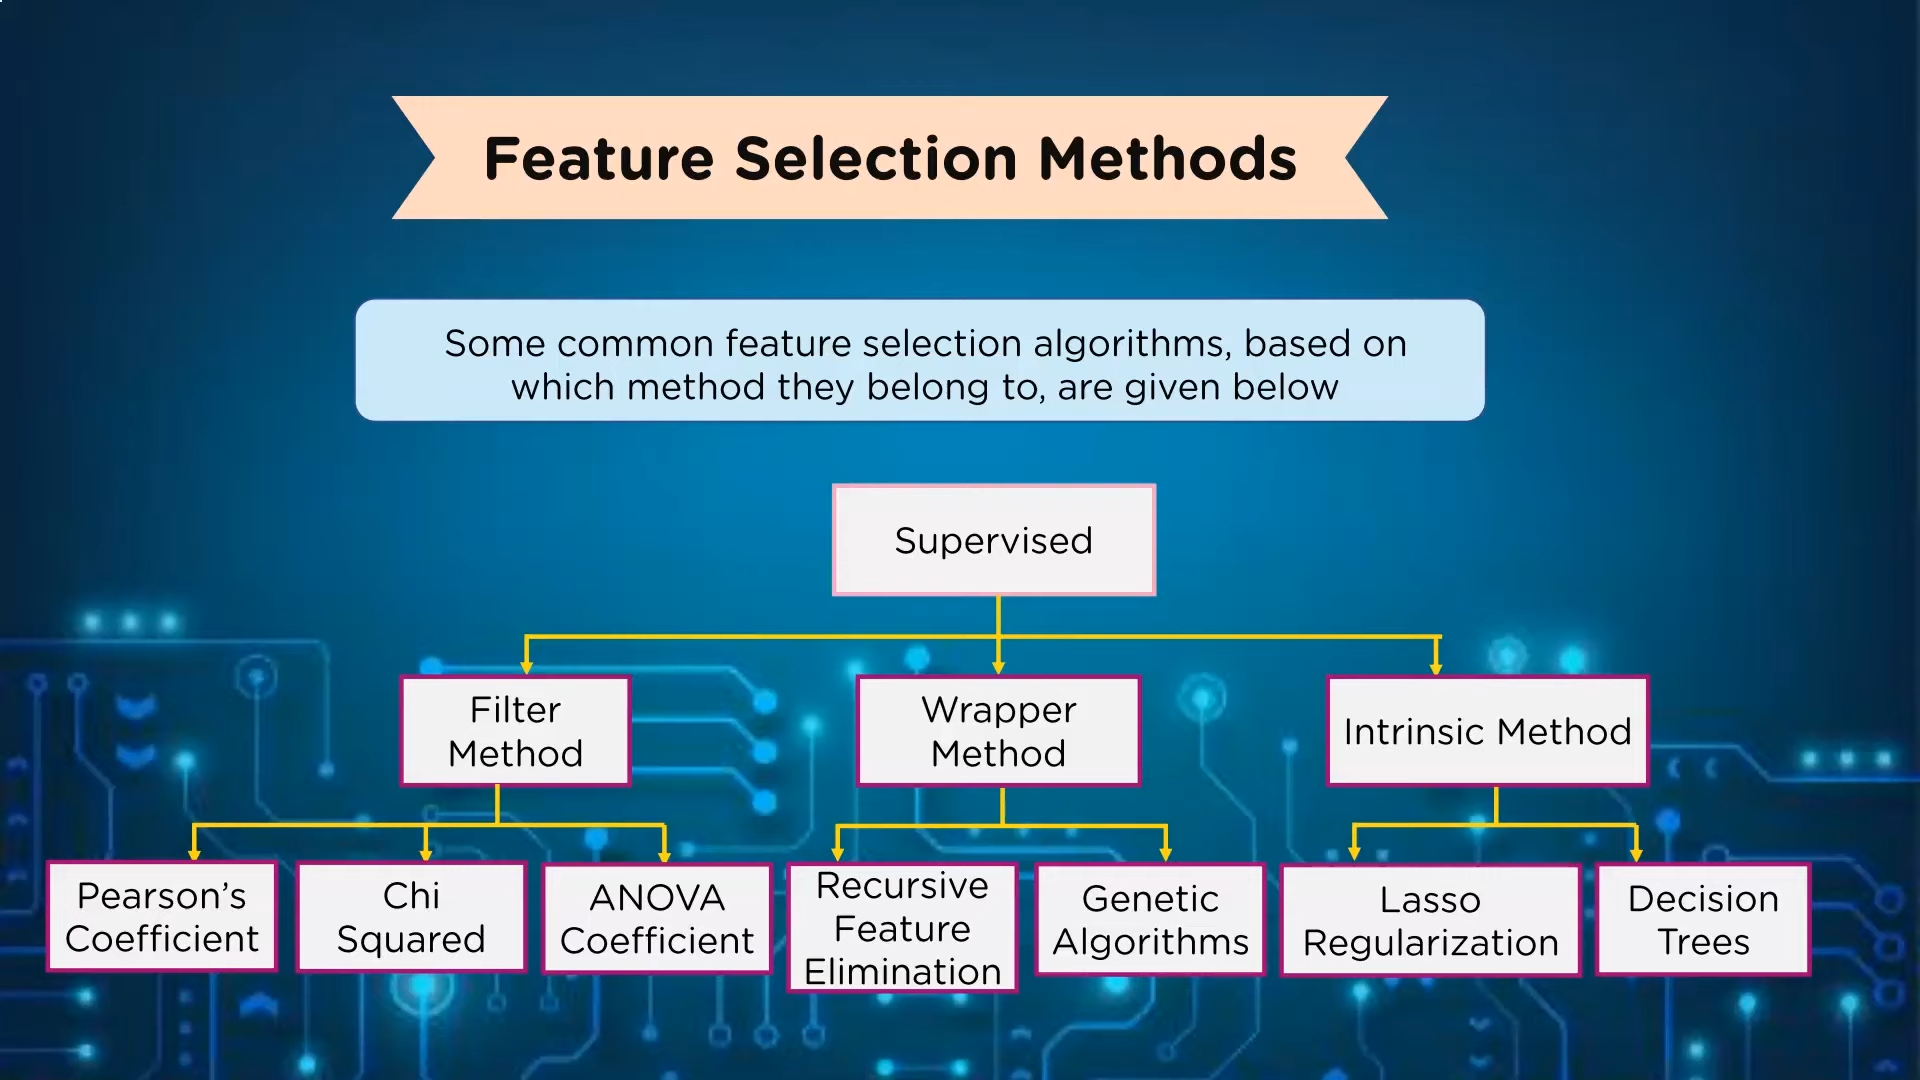

In [42]:
Image('/content/Feature Selection In Machine Learning _ Feature Selection Techniques With Examples _ Simplilearn 6-38 screenshot.png')

**What is RFE and how does it work?**
- This method selects the features by recursively removing the least important ones based on the feature weights or coefficients. You can use this method in combination with the random forest classifier to determine the optimal number of features that give the best performance.

**Why use RFE compared to filter methods (Pearson's coefficient, chi squared)?**

1. Technical Explanation:
In summary, RFE is a more powerful and flexible feature selection method compared to filter methods, as it considers the interaction between features and the performance of the machine learning model. 

2. In Relation to this dataset
This method is suitable because the dataset ia m using have a moderate number of features and I want to find the most informative subset.

Note: To Conduct RFE we first have to split our dataset.

### B. Splitting Data

**Split dataset to X and Y variables**

In [43]:
#split Fitur dan target
x= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']

**Perform 80/20 Data split**

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =42)

**Data Dimension**

In [45]:
x_train.shape, y_train.shape

((180, 12), (180,))

In [46]:
x_test.shape, y_test.shape

((45, 12), (45,))


### C. Scaling and Encoding 

**1. Scaling Data:**

First I will calculate the skew of continous numerical columns to figure out the best scaling method to use. 

In [47]:
skewness = df[['age', 'creatinine_phosphokinase','serum_creatinine', 'platelets', 'serum_sodium', 'time']].skew()
print(skewness)

age                         0.378300
creatinine_phosphokinase    0.961200
serum_creatinine            0.940092
platelets                   0.245318
serum_sodium               -0.110060
time                        0.071645
dtype: float64


**Observation:**

The  features, age, platelets, serum_sodium, creatinine_phosphokinase, serum_creatinine and time, have relatively low skewness values, which suggests that they may be closer to a normal distribution. 

However, the skewness values are not extremely low, so it may still be beneficial to use `standard scaling` to handle any potential outliers and to ensure that all features are on the same scale.

In [48]:
# Extract the columns to be scaled
cols_to_scale = ['age', 'creatinine_phosphokinase', 'serum_creatinine', 'platelets', 'serum_sodium', 'time']

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(x_train[cols_to_scale])

# Transform the training and test data using the scaler
x_train[cols_to_scale] = scaler.transform(x_train[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

Displaying the data after scaling:

In [49]:
x_train.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
220,-0.531224,0.0,0.831908,1.0,38.0,0.0,0.118511,1.997047,-0.800574,1.0,0.0,1.064004


**2.Encoding**

No Encoding because all of the data is already numeric.

### D. Recursive Feature Elimination

1. First we initialize a random forest classifier (RFC) with a random state of 42 and then initializes a recursive feature elimination with cross-validation (RFECV) object using the RFC estimator. 

2. The RFECV object will iteratively remove the weakest feature(s) until the specified number of features is reached, and cross-validation is performed to evaluate the performance of the model on each subset of features.

3. Finally, the RFECV object is fit on the training data (x_train and y_train) to determine the optimal number of features for the RFC model.

In [50]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize the RFE object with a step of 1 and 5-fold cross-validation
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='f1')

# Fit the RFE object on the training data
rfecv.fit(x_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='f1')

To make it easier for us to get Insight I will plot a `line graph` to see the cross validation scores with `different numbers of features` selected.

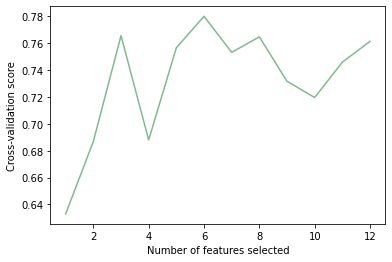

In [51]:
# Plot the cross-validation score vs. number of features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


In [52]:
# Print the optimal number of features and their indices
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features indices: ", rfecv.support_)


Optimal number of features: 6
Selected features indices:  [ True False  True False  True False  True  True False False False  True]


**Observation:**

- It seems that RFE have selected three features from the dataset and their corresponding indices are marked as True in a boolean array of length 12.

- The optimal number of features you have selected is 3, and the selected feature indices are [0, 4, 11]. This means that the first, fifth, and twelfth features in your original dataset have been selected for your model.

What column do these index represent?

We will use `iloc` to locate the column names

In [53]:
# Assuming x_train is a Pandas dataframe
selected_cols = x_train.columns[[0, 4, 11]]
print(selected_cols)


Index(['age', 'ejection_fraction', 'time'], dtype='object')


Then we remove the columns from our train and test data.

In [54]:
x_train.drop(x_train.columns.difference(selected_cols), axis=1, inplace=True)
x_test.drop(x_test.columns.difference(selected_cols), axis=1, inplace=True)

In [55]:
x_test.head(3)

,age,ejection_fraction,time
14,-0.943618,30.0,-1.598949
250,-0.448746,40.0,1.554199
158,-0.696182,30.0,-0.274097


**VIF TEST**

Before continouing I will conduct a vif test because one of the `assumptions of random forest` is there are no multicolinearity between features.

In [56]:
vif_df = pd.DataFrame()

In [57]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [58]:
vif = x_train
calc_vif(vif)

,variables,VIF
2,time,1.051804
0,age,1.051427
1,ejection_fraction,1.000368


**Observation:**

Based on the VIF values you provided, there does not appear to be any issue with multicollinearity among the selected features. VIF values less than 5 are generally considered acceptable, and all of the features you listed have VIF values significantly below this threshold.

Therefore, you should not need to remove any features due to multicollinearity.

## 7. Model Definition 

###A. Model Assumptions

There are some assumptions that should be considered when using Random Forest and ADA Boost:


1. The data should not contain any missing values. Random Forest can handle missing values, but imputing missing data with unrealistic values can lead to biased results.

  **Our Action:** Remove missing data and outliers ✅


2. The features should be scaled. Standardizing the features to have a mean of zero and a standard deviation of one can improve performance.

  **Our Action:** Scaled data using Standard Scaler  ✅


3. The features should be independent of each other. Correlated features can lead to overfitting and reduce the model's predictive power.

  **Our Action:** Scaled data using Standard Scaler  ✅


4. The model should be evaluated using an appropriate metric for the problem at hand. Accuracy is not always the best metric, especially when dealing with imbalanced datasets.

  **Our Action:** Use SMOTE to balance the dataset and identify cost of false possitive/negative  ✅


5. Overfitting can occur if the model is too complex or the data is too noisy.
  
  **Our Action:** Feature Selection using RFE(Wrapping technique)  ✅


6. The model should be properly tuned using techniques such as cross-validation and grid search. The optimal hyperparameters can depend on the problem and the dataset.

  **Our Action:** Cross validation and Hyperparameter tuning using Grid and random search  ✅


### B. Model Metrics

**What Model Metric to focus on?**

When comparing models that will be used in the medical field for predicting a particular outcome, such as disease diagnosis or `patient survival`, it is important to choose the evaluation metric that is most appropriate for the specific problem and the associated costs of making a false positive or false negative prediction.

`Recall` is a good metric to use in this case where the `cost of a false negative is high.`(e.g.,  predicting a patient of dying when they are) 

###C. Model Definition

1. AdaBoost Model Definition:

- AdaBoost (short for Adaptive Boosting) is a popular ensemble learning technique used for classification and regression problems.
- In AdaBoost, weak classifiers (classifiers that perform only slightly better than random guessing) are iteratively trained on the data, with each subsequent classifier focusing on the misclassified examples from the previous iteration.

2. Random Forest Model Definition:

- Random Forest is another popular ensemble learning technique used for classification and regression problems.
- In Random Forest, multiple decision trees are trained on different subsets of the data, with each tree voting on the final prediction. The randomness comes from the fact that each tree is trained on a random subset of the features, and a random subset of the data is used to train each tree.

## 8. Model Training and Evaluation

### 1. Random Forest (Using Default Parameters)

In [59]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
y_pred_train = rf_clf.predict(x_train)
y_pred_test = rf_clf.predict(x_test)

In [61]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))


============ Training Set Metrics:============ 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        34
         1.0       0.78      0.64      0.70        11

    accuracy                           0.87        45
   macro avg       0.83      0.79      0.81        45
weighted avg       0.86      0.87      0.86        45



### Model Analysis: 🧙

- The model achieved a perfect accuracy, precision, recall, and F1-score of 1.0 on the training set, indicating that it was able to perfectly fit the data in the training set.
- On the test set, the model achieved an accuracy of 0.87, which is lower than the training set accuracy, indicating that the model may have overfitted to the training data.
- The F1-score for class 0 is 0.91, indicating that the model can accurately classify non-death, while the F1-score for class 1 (fraudulent) is 0.87, indicating that the model has room for improvement in identifying death cases.

**Applying SMOTE to Imbalanced Dataset:**

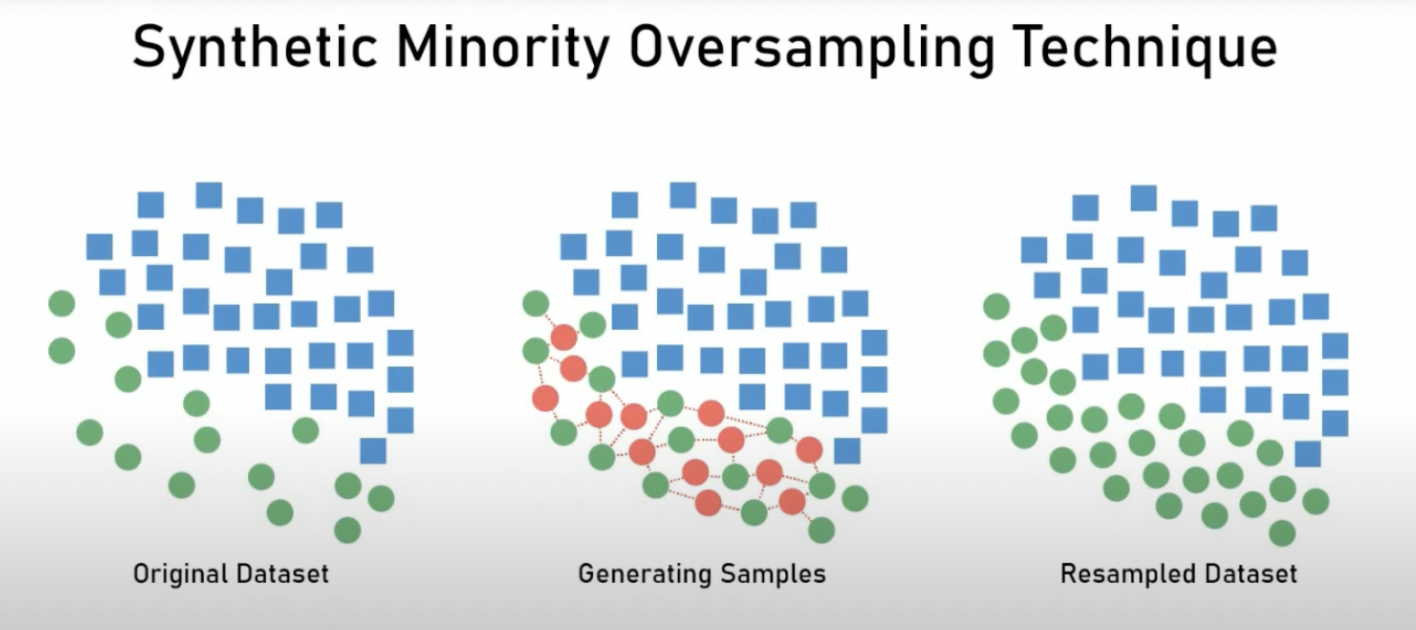

In [79]:
Image('/content/Screenshot 2023-03-17 at 19.29.02.png')

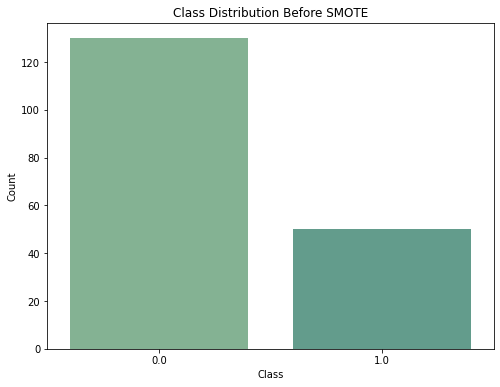

In [63]:


# Visualize the countplot of y_train before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



In [64]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


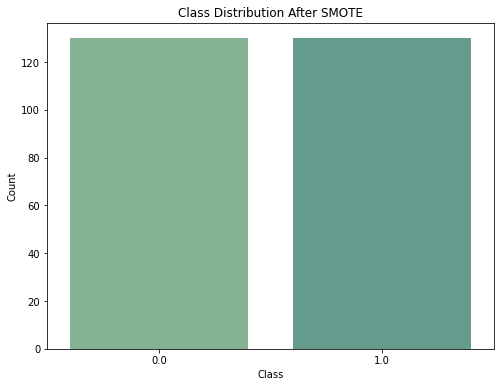

In [65]:

# Visualize the countplot of y_train after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [66]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [67]:
y_pred_train = rf_clf.predict(x_train_resampled)
y_pred_test = rf_clf.predict(x_test)

In [68]:

print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))


============ Training Set Metrics:============ 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00       130

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90        34
         1.0       0.67      0.73      0.70        11

    accuracy                           0.84        45
   macro avg       0.79      0.80      0.80        45
weighted avg       0.85      0.84      0.85        45



### Model Analysis: 🧙

Based on the metrics, we can see that after applying SMOTE, the precision and recall for the minority class (class 1) improved significantly both in the training set and the test set. Before SMOTE, the model was `not able to predict the minority class` accurately in the test set, with a recall score of `only 0.64`. However, `after applying SMOTE`, the recall score `improved to 0.73`, which indicates that the model is better at identifying the minority class.

Overall, the SMOTE technique helped to improve the performance of the model in predicting the minority class, and it can be concluded that SMOTE was a useful technique to balance the class distribution and improve the model's performance.

### 2. AdaBoost (Adaptive Boosting) (Using Default Parameters and balanced data)

The AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique in Machine Learning used as an Ensemble Method. In Adaptive Boosting, all the weights are re-assigned to each instance where higher weights are given to the incorrectly classified models, and it fits the sequence of weak learners on different weights.

In [69]:
# Initialize and train the AdaBoost classifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train_resampled, y_train_resampled)

AdaBoostClassifier()

In [70]:
# Predict on the training and test sets
y_pred_train = ab_clf.predict(x_train_resampled)
y_pred_test = ab_clf.predict(x_test)

In [71]:
# Print the classification report for the training and test sets
print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       130
         1.0       0.94      0.92      0.93       130

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90        34
         1.0       0.67      0.73      0.70        11

    accuracy                           0.84        45
   macro avg       0.79      0.80      0.80        45
weighted avg       0.85      0.84      0.85        45



### Model Analysis: 🧙


Comparing the two classification reports, we can make the following observations:

- The overall accuracy of AdaBoost (0.84) is same than that of Random Forest (0.84), indicating that AdaBoost has make similir predictions.

- AdaBoost the same precision for class 1 (0.67) than Random Forest (0.67), meaning that it has a same false positive rate for this class.

- Random Forest has the same  recall for class 1 (0.73) than AdaBoost (0.73), indicating that they both identified similar number of positive cases.

- The f1-score for class 1 is same in AdaBoost (0.70) than in Random Forest (0.70), indicating that they both achieve similar balance between precision and recall for this class.

Based on these observations, we can conclude that AdaBoost peformed similarly to Random Forest

##9. Cross Validation

In [72]:
# Perform cross-validation on rf_clf and compute recall scores
rf_recall_scores = cross_val_score(rf_clf, x_train_resampled, y_train_resampled, cv=5, scoring='recall')

# Compute average and standard deviation of recall scores for rf_clf
rf_recall_avg = rf_recall_scores.mean()
rf_recall_std = rf_recall_scores.std()

# Perform cross-validation on ab_clf and compute recall scores
ab_recall_scores = cross_val_score(ab_clf, x_train_resampled, y_train_resampled, cv=5, scoring='recall')

# Compute average and standard deviation of recall scores for ab_clf
ab_recall_avg = ab_recall_scores.mean()
ab_recall_std = ab_recall_scores.std()

# Print the results
print("Random Forest Recall: {:.2f} (+/- {:.2f})".format(rf_recall_avg, rf_recall_std))
print("Adaboost Recall: {:.2f} (+/- {:.2f})".format(ab_recall_avg, ab_recall_std))


Random Forest Recall: 0.90 (+/- 0.07)
Adaboost Recall: 0.86 (+/- 0.09)


**Observation:**

- Random forest model is better than the Adaboost model based on the recall score even though the Adaboost model has a higher recall score mean.

- This is because the recall score's standard deviation for the random forest model is smaller than that of the Adaboost model. A `smaller standard deviation `indicates that the recall scores for the random forest model are more `consistent and less varied` than those of the Adaboost model. 

- Therefore, the `random forest` model is `more reliable` in terms of its performance on new data.

##10. Hyperparameter Tuning

###1. Grid Search CV

This code defines a parameter grid for the random forest classifier, creates a GridSearchCV object with 5-fold cross-validation and recall scoring, fits the grid search object to the resampled data, prints the best parameters and best score, uses the best model to predict on the test set, and finally prints the classification report and confusion matrix.





In [73]:

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create random forest classifier
rf_clf = RandomForestClassifier()

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='recall')

# Fit the grid search object to the resampled data
grid_search.fit(x_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Recall Score: ", grid_search.best_score_)

# Use the best model to predict on the test set
y_pred = grid_search.predict(x_test)

# Print the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Recall Score:  0.9384615384615385
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.93        34
         1.0       0.80      0.73      0.76        11

    accuracy                           0.89        45
   macro avg       0.86      0.83      0.84        45
weighted avg       0.89      0.89      0.89        45

Confusion Matrix:
 [[32  2]
 [ 3  8]]


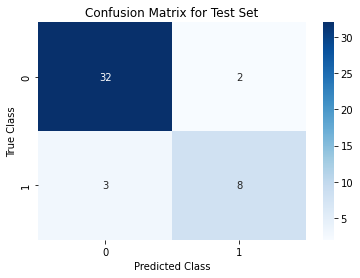

In [74]:

# Plot the confusion matrix for the test set using Seaborn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Observation:**

Grid Search:

- The best hyperparameters are {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}. 💯 
- The best recall score is 0.9384.
- The classification report and confusion matrix show an accuracy of 0.89, with 2 false positives and 3 false negatives.

###2. Random Search CV

In [75]:
# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 201),
    'max_depth': [5, 10, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

# Create random forest classifier
rf_clf = RandomForestClassifier()

# Create RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, cv=5, scoring='recall', n_iter=20)

# Fit the random search object to the resampled data
random_search.fit(x_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Recall Score: ", random_search.best_score_)

# Use the best model to predict on the test set
y_pred = random_search.predict(x_test)

# Print the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 96}
Best Recall Score:  0.9461538461538461
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        34
         1.0       0.73      0.73      0.73        11

    accuracy                           0.87        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.87      0.87      0.87        45

Confusion Matrix:
 [[31  3]
 [ 3  8]]


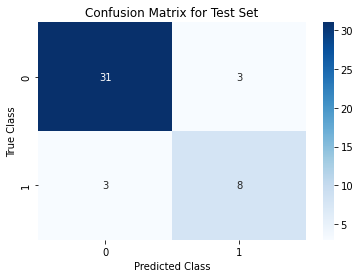

In [76]:

# Plot the confusion matrix for the test set using Seaborn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Observation:**

Random Search:

- The best hyperparameters are {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 96}.
- The best recall score is 0.94615
- The classification report and confusion matrix show an accuracy of 0.87, with 3 false positives and 3 false negatives.


### 3. Hyperparameter Tuning Conclusion

Looking at the results of the random search and grid search, we can see that both methods have produced similar recall scores, with random search slightly outperforming grid search in this case. 

However, the best parameters found by each method are slightly different, with random search resulting in a higher number of estimators and a lower minimum number of samples required to split an internal node in a decision tree.


1. Grid Search Best Recall Score:  0.9384

2. Random Search Best Recall Score: 0.94615




##11. Overall Analysis

Based on the provided summaries, we can compare the performance of Random Forest and Adaboost models on the given dataset

### 1.Random Forest Model
A. Strengths: 💪
- Random Forest can handle a large number of features and can be effective at capturing complex non-linear relationships between features and the target variable.
- Random Forest is less susceptible to overfitting than single decision trees, and can provide good generalization performance.

B. Weaknesses: 🔰
- Random Forest can be slower and require more computational resources than some other models, particularly for large datasets with many features.
- Random Forest can be more difficult to interpret than some other models, particularly if the feature importance measures are not well defined or do not align with domain knowledge.


---


### 2.Adaboost Model
A. Strengths: 💪
- AdaBoost can be very effective at improving the performance of weak learners, resulting in strong overall performance.
- AdaBoost is relatively fast and efficient, particularly for binary classification problems.

B. Weaknesses: 🔰
- AdaBoost is susceptible to overfitting if the weak learners are too complex or if the training data contains outliers or noisy data points.
- AdaBoost is sensitive to the choice of weak learner, and may perform poorly if the weak learners are not appropriate for the data or problem at hand.


---


### 3.Cross Validation Conclusion 🔖
- Random forest model is better than the Adaboost model based on the recall score even though the Adaboost model has a higher recall score mean.

- This is because the recall score's standard deviation for the random forest model is smaller than that of the Adaboost model. A `smaller standard deviation `indicates that the recall scores for the random forest model are more `consistent and less varied` than those of the Adaboost model. 

- Therefore, the `random forest` model is `more reliable` in terms of its performance on new data.

---

### 4.Hyperparameter Tuning Conclusion 🔖
Looking at the results of the random search and grid search, we can see that both methods have produced similar recall scores, with random search slightly outperforming grid search in this case. 

However, the best parameters found by each method are slightly different, with random search resulting in a higher number of estimators and a lower minimum number of samples required to split an internal node in a decision tree.


1. Grid Search Best Recall Score:  0.9384

2. Random Search Best Recall Score: 0.94615

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 96}

---

### 5.Further Improvement 📈

- Feature engineering: consider creating new features or transforming existing ones to better capture the underlying patterns in the data.
- Model selection: try out other ensemble methods or classification models to see if they can improve performance.
- Data augmentation: explore techniques such as oversampling or data synthesis to increase the size and diversity of the training set.
- Regularization: experiment with different types of regularization, such as L1 or L2 regularization, to prevent overfitting.
- Ensemble methods: consider combining different models or using advanced ensemble techniques such as stacking or boosting to further improve performance.
- Hyperparameter tuning: continue to refine the hyperparameters of the model to find the optimal configuration.
- Error analysis: examine the types of errors made by the model to identify patterns or areas of weakness, and adjust the model accordingly.


##12. Saving Model

In [81]:
best_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 96}

# Train the model on the training set using the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

In [82]:
# Save the file
with open('rf_model_best.pkl','wb') as file_1:
  joblib.dump(best_rf, file_1)

with open('standard_scaler.pkl','wb') as file_2:
  joblib.dump(scaler, file_2)

## 13. Conceptual Problems ❓

Jawab pertanyaan berikut:


1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !


- Bagging (Bootstrap Aggregating) is an ensemble learning technique to improve the accuracy and stability of the model.
- It involves training multiple models on different subsets of the training data and averaging their predictions to reduce the variance of the model.
- Bagging is commonly used to improve decision tree-based models, such as Random Forests.
- Random Forests combine the predictions of multiple decision trees trained on different random subsets of the training data.
- By introducing randomness in the model building process, Random Forests reduce the correlation among the trees and prevent overfitting.
- Random Forests have several advantages over traditional decision trees, including being less prone to overfitting, handling missing values and noisy data, and providing estimates of feature importance.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

**1. Random Forest:**

- Is an ensemble method that constructs multiple decision trees and combines their predictions through majority voting or averaging.
- Builds decision trees independently, without considering the outcomes of previous trees.
- Reduces overfitting by randomly selecting a subset of features and training each tree on a different subset of the data.
- Can handle missing data and maintain accuracy even with a large number of input variables.

**2. AdaBoost:**

- Is an ensemble method that combines multiple weak learners into a strong learner.
- Gives more weight to the samples that were misclassified by previous weak learners.
- Focuses on the hard samples and tries to classify them correctly.
- May be more susceptible to overfitting if the base estimator is too complex or the number of iterations is too large.



## External Learning Resource and Reference

Feature Selection
- https://www.youtube.com/watch?v=5bHpPQ6_OU4&ab_channel=Simplilearn

SMOTE
- https://www.youtube.com/watch?v=adHqzek--d0&ab_channel=DataMagic%28bySunnyKusawa%29

Boosting Algorithm
- https://www.analyticsvidhya.com/blog/2021/04/best-boosting-algorithm-in-machine-learning-in-2021/ 

Conceptual Problems
- https://www.analyticsvidhya.com/blog/2021/04/best-boosting-algorithm-in-machine-learning-in-2021/
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning

P1GC3 Instructions:
- https://github.com/H8-Assignments-Bay/p1-ftds004-hck-g3-karelhutajulu
